#Project Title 6 : Customer Segmentation Analysis using K-Means Clustering
**Project Goal:** To perform unsupervised customer segmentation on the "Mall Customers" dataset, identifying distinct customer groups based on their spending habits and demographic information. This project aims to demonstrate proficiency in applying K-Means clustering, evaluating clustering performance, and visualizing the resulting segments.
Objectives:
1.	Dataset Acquisition and Preparation:
o	Acquire and load the "Mall Customers" dataset.
o	Perform necessary initial data cleaning and feature selection to prepare the dataset for clustering, ensuring only relevant numerical features are utilized. This may include handling categorical data if applicable (e.g., gender, if used in clustering).
2.	K-Means Clustering Implementation and Optimization:
o	Apply the K-Means clustering algorithm to segment the customer data.
o	Determine the optimal number of clusters (k) using two distinct evaluation methods:
	Elbow Method: Plot the sum of squared distances (inertia) for various values of k and identify the "elbow point."
	Silhouette Score: Calculate and plot the silhouette score for different values of k, aiming to identify the k that yields the highest score.
3.	Cluster Analysis and Visualization:
o	Train the K-Means model with the optimal number of clusters identified from the evaluation methods.
o	Assign each customer to their respective cluster.
o	Visualize the resulting customer segments. This visualization should be presented in a 2D or 3D scatter plot (depending on the number of features used for clustering), with each cluster distinctly color-coded. Relevant features should be chosen for the axes to highlight the separation of clusters.
Tools/Libraries:
•	Python 3.x
•	Pandas (for data manipulation)
•	Scikit-learn (for clustering: KMeans, and metrics: silhouette_score)
•	Matplotlib (for plotting)
•	Seaborn (for enhanced visualizations)
•	Numpy (for numerical operations, if needed)
Deliverables:
•	A well-structured and commented Python script (.py or .ipynb) containing all steps from data loading to clustering, evaluation, and visualization.
•	Plots for both the Elbow Method and Silhouette Score to justify the chosen number of clusters.
•	A high-resolution image file (e.g., .png) of the 2D or 3D cluster visualization, clearly showing the segmented customer groups.
•	A brief markdown or documentation section providing:
o	The rationale for the selected optimal number of clusters.
o	An interpretation of the characteristics of each identified customer segment based on the features.
Success Criteria:
•	K-Means clustering is successfully applied to the dataset.
•	Both the Elbow Method and Silhouette Score are correctly implemented and their results presented.
•	A justified optimal number of clusters is determined.
•	The clusters are effectively visualized in a 2D or 3D space, demonstrating clear separation.
•	The code is clean, well-documented, and reproducible.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

###Dataset Acquisition and Preparation

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Basic Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#checking if there any null
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There is no any null values and almost data is correct.

**Featur selection**: for now i am just using two featurs for clustring thats are 'Annual Income (k$)', 'Spending Score (1-100)'

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


###Step 2: K-Means Clustering Implementation & Optimization

* First, we’ll test different values of k.

* Then we’ll choose the best one using Elbow + Silhouette.

**Elbow Method**

In [ ]:
# list to store sum of squared distances
inertia = []

In [ ]:
# test k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

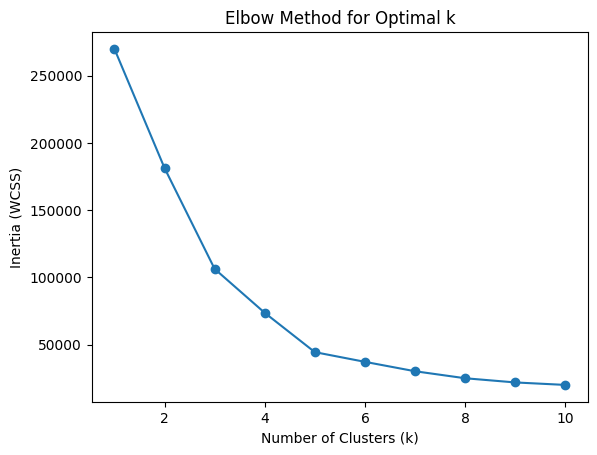

In [ ]:
# plot elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

“The curve drops quickly until 3, then starts to level off. Around 5 the line becomes almost flat, so 5 looks like a good number of clusters.”

**Silhouette Score**

In [ ]:
silhouette_scores = []

In [ ]:
# silhouette score only works for k>=2
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

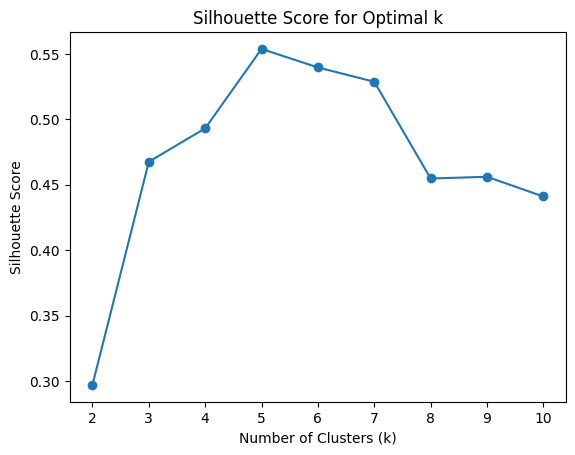

In [ ]:
# plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

“The silhouette score is highest at k = 5. This means 5 clusters give the best separation between groups.”

###Step 3: Cluster Analysis & Visualization

In [ ]:
#Train Final K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)


“We trained the K-Means model with 5 clusters and assigned each customer to a cluster. A new column ‘Cluster’ was added to the dataset.”

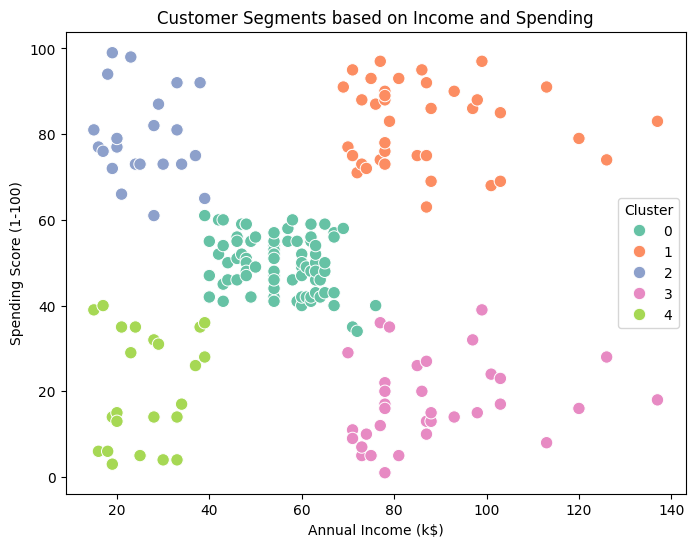

In [ ]:
# Visualize Clusters (2D plot – Income vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2',
    s=80
)
plt.title('Customer Segments based on Income and Spending')
plt.show()

* Cluster 0 (Green) → Customers with average income and average spending.
These are budget customers. They don’t have much income and they also spend less.

* Cluster 1 (Orange) → Customers with high income and high spending.
These are premium customers. They have money and they also spend a lot, the best customers for business.

* Cluster 2 (Blue) → Customers with low income but high spending.
These are impulsive shoppers. Even with low income, they spend more, maybe on offers or lifestyle.

* Cluster 3 (Pink) → Customers with high income but low spending.
These are potential customers. They have good income but don’t spend much, business can target them with promotions.

* Cluster 4 (Cyan/Teal) → Customers with low income and low spending.
These are middle customers, stable and balanced.

#Moving with three featurs now

Featur selection: for now i am just using two featurs for clustring thats are 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'

In [ ]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)


**Elbow Method**

In [ ]:
inertia = []
K = range(1,11)


In [ ]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    inertia.append(kmeans.inertia_)


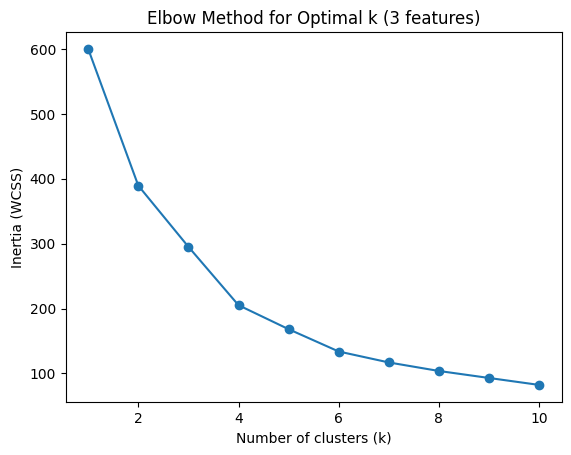

In [ ]:
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k (3 features)')
plt.show()

“The elbow curve bends around k = 5. This shows 5 could be a good choice.”

**Silhouette Score**

In [ ]:
silhouette = []
K = range(2,11)

In [ ]:

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X3_scaled)
    silhouette.append(silhouette_score(X3_scaled, labels))

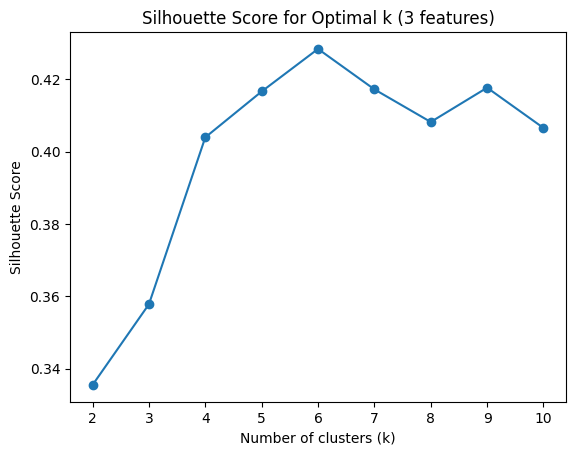

In [ ]:
plt.plot(K, silhouette, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (3 features)')
plt.show()

“The silhouette score is highest at k = 6. This means 6 clusters give the best separation of groups.”

“Elbow suggests 5 clusters, while silhouette suggests 6 clusters. Since silhouette directly measures how well groups are separated, we will go with k = 6 as the final choice.”

###Step 3: Cluster Analysis & Visualization For 3 Features

In [ ]:
kmeans3 = KMeans(n_clusters=6, random_state=42, n_init=10)
df['Cluster3'] = kmeans3.fit_predict(X3_scaled)

“We trained KMeans with 6 clusters on Age, Income, and Spending, and added the cluster labels to the dataset.”

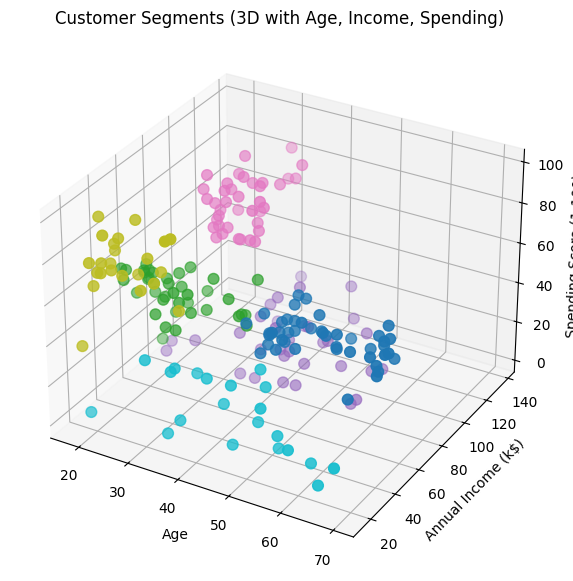

In [ ]:
#3D Visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
    c=df['Cluster3'], cmap='tab10', s=60
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (3D with Age, Income, Spending)')
plt.show()


In [ ]:
# check the cluster centers table.
centers = scaler.inverse_transform(kmeans3.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=X3.columns)
print(centers_df.round(1))

    Age  Annual Income (k$)  Spending Score (1-100)
0  56.3                54.3                    49.1
1  26.8                57.1                    48.1
2  41.9                88.9                    17.0
3  32.7                86.5                    82.1
4  25.0                25.3                    77.6
5  45.5                26.3                    19.4


Cluster 0 → Age ~56, Income ~54k, Spending ~49
→ Older, middle–income, average spending. (steady balanced group)

Cluster 1 → Age ~27, Income ~57k, Spending ~48
→ Young, middle–income, average spending. (young stable group)

Cluster 2 → Age ~42, Income ~89k, Spending ~17
→ Middle-aged, high income, very low spending. (high potential but don’t spend much)

Cluster 3 → Age ~33, Income ~87k, Spending ~82
→ Young–adult, high income, very high spending. (premium customers, best segment)

Cluster 4 → Age ~25, Income ~25k, Spending ~78
→ Very young, low income, high spending. (impulsive shoppers, maybe students/young adults)

Cluster 5 → Age ~46, Income ~26k, Spending ~19
→ Older, low income, low spending. (budget-conscious group)